# Notes
Unit 3, Lesson 1
Pick your own dataset,  do PCA, RFE (another way to do feature selection) (sklearn.feature_selection rfe), holdout groups, cross validation.

All projects need to have this set up from now on, so Lesson 2 challenge is going to need same setup.  Need to think about the Lesson 1 necessary need to measure distance.

It is also a given that you need to understand dataset, so if you need to cleanup or alter it, do it.

# Challenge Description
You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

# Information
First data is obtained from: https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking/data
However, there isn't enough variety of columns to work with.

Second data is obtained from: https://www.kaggle.com/etiennelq/french-employment-by-town/data
This is a data on French employment, salaries, and population per town.  The focus of this dataset will be salaries.

In [35]:
import math
import warnings
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:3f}'.format

# Suppress warnings
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

# Bring in data
df = pd.read_csv("net_salary_per_town_categories.csv")
# Rename column headers to make it easier to work with
#df.columns = ['Geographic_Code', 'French_Town_Name', 'Region_Number', 'Department_Number', 'Total_Number_Firms', 'Null_Size_Firms', '1-5_Employees', '6-9_Employees', '10-19_Employees', '20-49_Employees', '50-99_Employees', '100-199_Employees', '200-499_Employees', 'Over_500_Employees']
df.columns = ['Town_Code','Town_Name','Mean_Net_Salary_MNS','Executive_MNS','Middle_Manager_MNS','Employee_MNS','Worker_MNS','Women_MNS','Feminine_Executive_MNS','Feminine_Middle_Manager_MNS','Feminine_Employee_MNS','Feminine_Worker_MNS','Men_MNS','Masculine_Executive_MNS','Masculine_Middle_Manager_MNS','Masculine_Employee_MNS','Masculine_Worker_MNS','18-25_Years_MNS','26-50_Years_MNS','>50_Years_MNS','Women_18-25_Years_MNS','Women_26-50_Years_MNS','Women_>50_Years_MNS','Men_18-25_Years_MNS','Men_26-50_Years_MNS','Men_>50_Years_MNS']
# Remove NaN values
df = df.fillna(0)

df.head()

,Town_Code,Town_Name,Mean_Net_Salary_MNS,Executive_MNS,Middle_Manager_MNS,Employee_MNS,Worker_MNS,Women_MNS,Feminine_Executive_MNS,Feminine_Middle_Manager_MNS,...,Masculine_Worker_MNS,18-25_Years_MNS,26-50_Years_MNS,>50_Years_MNS,Women_18-25_Years_MNS,Women_26-50_Years_MNS,Women_>50_Years_MNS,Men_18-25_Years_MNS,Men_26-50_Years_MNS,Men_>50_Years_MNS
0,01004,Ambérieu-en-Bugey,13.700000,24.200000,15.500000,10.300000,11.200000,11.600000,19.100000,13.200000,...,11.600000,10.500000,13.700000,16.100000,9.700000,11.800000,12.500000,11.000000,14.900000,18.600000
1,01007,Ambronay,13.500000,22.100000,14.700000,10.700000,11.400000,11.900000,19.000000,13.300000,...,11.700000,9.800000,13.800000,14.600000,9.200000,12.200000,12.500000,10.200000,14.900000,16.400000
2,01014,Arbent,13.500000,27.600000,15.600000,11.100000,11.100000,10.900000,19.500000,11.700000,...,11.800000,9.300000,13.300000,16.000000,8.900000,10.600000,12.500000,9.600000,15.100000,18.600000
3,01024,Attignat,12.900000,21.800000,14.100000,11.000000,11.300000,11.400000,19.000000,13.000000,...,11.600000,9.600000,12.900000,14.200000,9.300000,11.400000,12.200000,9.700000,13.800000,15.900000
4,01025,Bâgé-la-Ville,13.000000,22.800000,14.100000,10.500000,11.100000,11.600000,19.400000,13.600000,...,11.400000,9.400000,12.800000,15.200000,9.000000,11.800000,12.300000,9.700000,13.400000,16.900000


In [36]:
# Remove columns not to be added
#df = df.drop(columns=['Geographic_Code', 'French_Town_Name', 'Region_Number', 'Department_Number'])
df = df.drop(columns=['Town_Code','Town_Name'])

df.head()

,Mean_Net_Salary_MNS,Executive_MNS,Middle_Manager_MNS,Employee_MNS,Worker_MNS,Women_MNS,Feminine_Executive_MNS,Feminine_Middle_Manager_MNS,Feminine_Employee_MNS,Feminine_Worker_MNS,...,Masculine_Worker_MNS,18-25_Years_MNS,26-50_Years_MNS,>50_Years_MNS,Women_18-25_Years_MNS,Women_26-50_Years_MNS,Women_>50_Years_MNS,Men_18-25_Years_MNS,Men_26-50_Years_MNS,Men_>50_Years_MNS
0,13.700000,24.200000,15.500000,10.300000,11.200000,11.600000,19.100000,13.200000,10.100000,9.600000,...,11.600000,10.500000,13.700000,16.100000,9.700000,11.800000,12.500000,11.000000,14.900000,18.600000
1,13.500000,22.100000,14.700000,10.700000,11.400000,11.900000,19.000000,13.300000,10.600000,10.000000,...,11.700000,9.800000,13.800000,14.600000,9.200000,12.200000,12.500000,10.200000,14.900000,16.400000
2,13.500000,27.600000,15.600000,11.100000,11.100000,10.900000,19.500000,11.700000,10.800000,9.500000,...,11.800000,9.300000,13.300000,16.000000,8.900000,10.600000,12.500000,9.600000,15.100000,18.600000
3,12.900000,21.800000,14.100000,11.000000,11.300000,11.400000,19.000000,13.000000,10.300000,9.900000,...,11.600000,9.600000,12.900000,14.200000,9.300000,11.400000,12.200000,9.700000,13.800000,15.900000
4,13.000000,22.800000,14.100000,10.500000,11.100000,11.600000,19.400000,13.600000,10.200000,9.800000,...,11.400000,9.400000,12.800000,15.200000,9.000000,11.800000,12.300000,9.700000,13.400000,16.900000


In [37]:
df.describe() # Summary of the data

,Mean_Net_Salary_MNS,Executive_MNS,Middle_Manager_MNS,Employee_MNS,Worker_MNS,Women_MNS,Feminine_Executive_MNS,Feminine_Middle_Manager_MNS,Feminine_Employee_MNS,Feminine_Worker_MNS,...,Masculine_Worker_MNS,18-25_Years_MNS,26-50_Years_MNS,>50_Years_MNS,Women_18-25_Years_MNS,Women_26-50_Years_MNS,Women_>50_Years_MNS,Men_18-25_Years_MNS,Men_26-50_Years_MNS,Men_>50_Years_MNS
count,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,...,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000
mean,13.706386,23.703836,14.575876,10.564505,11.235650,12.038026,20.220502,13.274260,10.308879,9.827161,...,11.498189,9.549766,13.495444,15.877220,9.161565,12.055160,13.174143,9.820872,14.485981,17.679809
std,2.559329,2.836183,1.490110,0.811775,1.221755,1.787995,2.327550,0.990166,0.747563,1.104684,...,1.289598,0.997444,2.363144,3.585860,0.453023,1.825306,2.249391,1.539949,2.852490,4.530257
min,10.200000,16.000000,11.600000,8.700000,8.300000,9.300000,12.000000,10.600000,8.700000,6.100000,...,8.900000,7.900000,9.700000,10.500000,7.500000,9.100000,9.500000,7.800000,9.600000,10.800000
25%,12.100000,21.900000,13.800000,10.000000,10.600000,10.900000,18.800000,12.600000,9.800000,9.200000,...,10.800000,9.200000,12.000000,13.700000,8.900000,10.900000,11.700000,9.400000,12.700000,14.900000
50%,13.000000,23.200000,14.400000,10.400000,11.000000,11.500000,20.000000,13.100000,10.100000,9.700000,...,11.300000,9.500000,12.900000,15.000000,9.100000,11.600000,12.600000,9.700000,13.800000,16.600000
75%,14.400000,24.900000,15.100000,10.900000,11.600000,12.700000,21.400000,13.800000,10.600000,10.200000,...,11.900000,9.700000,14.300000,16.900000,9.400000,12.700000,14.000000,10.000000,15.500000,19.000000
max,43.300000,51.500000,54.600000,17.500000,46.300000,26.700000,35.500000,19.000000,16.100000,28.100000,...,53.200000,60.600000,38.100000,56.900000,12.000000,26.600000,31.000000,93.300000,45.400000,68.600000


# Create Linear Regression Model

In [38]:
# Instantiate linear regression
regr = linear_model.LinearRegression()
Y = df['Mean_Net_Salary_MNS']
X = df.drop(['Mean_Net_Salary_MNS'],axis=1)
regr.fit(X, Y)
                    
# Check the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.69096207e-02  2.05939816e-02  2.10092908e-02  2.81261158e-03
  4.48285255e-01 -4.13467375e-03 -9.79631745e-03 -1.91467698e-02
 -3.98326983e-04  5.53524491e-01 -1.10383104e-02 -9.39481142e-03
 -5.39835898e-03  6.51283779e-03  6.90965093e-02  5.82946275e-01
  2.13715842e-01 -3.25673113e-02 -2.65287583e-01 -9.53500358e-02
 -3.97297402e-02 -3.22503780e-01 -1.19135050e-01]

Intercept: 
 -0.03823969263372895

R-squared:
0.9996441438468145


# PCA Application Applied to Linear Regression Model

In [39]:
# X is the scalar of the df data.  Standardize features by removing the mean and scaling to unit variance.
# Dataset might behave badly if the individual feature do no look like standard distributed data.

# Prepare the X and Y variable, where Y is dataframe column.
# fit_transform fits the model with X and apply dimensionality reduction on X.
pca = PCA(0.90)
pca.fit(X)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.singular_values_)

[91.02686501  6.53048412  4.94334593]
[0.80379462 0.05766614 0.04365123]
[0.80379462 0.86146076 0.90511199]
[683.68337104 183.12300766 159.32382542]


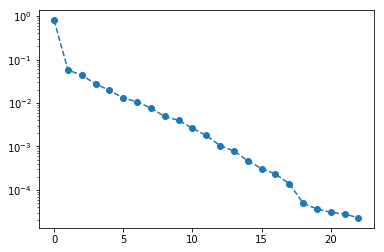

In [40]:
# Y axis says how much can be explained, where 9th variable has very small impact on predicting Property.
pca = PCA().fit(X)

plt.semilogy(pca.explained_variance_ratio_, '--o')
plt.show()

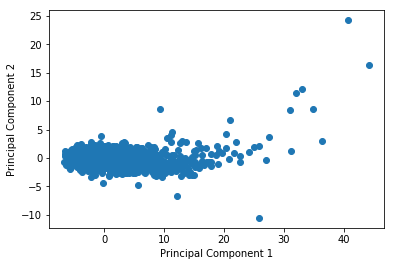

(5136, 23)
(5136, 8)
[[ 3.27282597e-01  1.51383140e+00  9.10470204e-02 ... -8.08099419e-01
  -1.12471989e+00  1.23327505e-01]
 [-1.69903379e-01  5.26741279e-01 -7.66685192e-01 ...  1.21904294e-01
  -3.77623856e-03 -1.71640624e-01]
 [ 4.75882775e-01  7.68894763e-02  1.80851194e+00 ...  1.13644308e+00
  -1.20633740e+00  1.07600260e+00]
 ...
 [-1.57999738e+00 -5.59749340e-01  2.94187555e-01 ... -2.12785077e-01
   8.57684213e-01 -1.19104676e-01]
 [-3.25260294e+00 -3.85206154e-01  1.51879276e-01 ...  7.77493943e-02
  -9.50165839e-01 -8.21385781e-01]
 [-5.05309649e+00 -1.32259820e-01  6.57337583e-01 ... -1.33668351e+00
  -4.24843020e-02 -5.47250503e-01]]


In [41]:
# Which variables/how many variables to keep
from sklearn.preprocessing import StandardScaler

# Each of 9 variables (out of 10) have different ranges.
# Standard Scalar makes it so all these different ranges makes sense.
# Standard = each number in the ranges are subtracted by the mean, and divided by standard deviation squared.
# Standard Scalar = same thing, but now the range is 0 to 1. Make everything comparable.
# Some examples are tests, intelligence levels, etc. Trying to standardize everyone.
X_std = StandardScaler().fit_transform(X)

# Pick the smallest number of Principal Components that explain 95% of the variables.
# That number is = to number of variables you should choose.
sklearn_pca = PCA(0.95)
Y_sklearn = sklearn_pca.fit_transform(X_std)

plt.scatter(Y_sklearn[:,0], Y_sklearn[:,3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Each of the column is equal to the principal component.
# 5136 rows, 23 columns.
# 5136 rows, 8 columns.
print(X_std.shape)
print(Y_sklearn.shape)
print(Y_sklearn)

In [42]:
# Instantiate linear regression
# fitting the PCA on the X_std (reduce number of variables)
# mapping of the X_std standard scalar
X_fit = sklearn_pca.fit_transform(X_std)

regr = linear_model.LinearRegression()
regr.fit(X_fit, Y)
                    
# Check the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_fit, Y))


Coefficients: 
 [ 0.63866507 -0.06864144  0.12423889  0.00401742 -0.08022677  0.16391541
 -0.13245007 -0.27554395]

Intercept: 
 13.70638629283489

R-squared:
0.9832378117656319


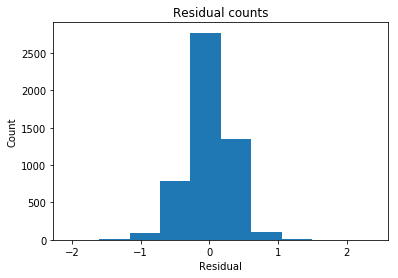

In [43]:
#### Extract predicted values.
predicted = regr.predict(X_fit).ravel()
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Apply Data Splitting

In [44]:
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
## Holdout Groups is commonly starting at 30% of data, but 1% to 50% is okay.
data = X_fit
target = Y
print(data.shape)
print(target.shape)

# Test your model with different holdout groups.
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    #clf.fit(trainingData, trainingScores)
    clf.fit(X_train, y_train)
    #print(clf.predict(predictionData),'\n')
    print(clf.predict(data), '\n')

(5136, 8)
(5136,)
28760
12328
3595
1541
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[13.80041807 13.55476102 13.99000553 ... 12.17414838 11.82577643
 10.90793719] 

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
[13.73009713 13.49430735 14.37200029 ... 12.62818317 12.12819947
 10.60080115] 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
[13.81242036 13.52147241 14.29241418 ... 12.55838482 12.05646511
 10.52625819] 

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     

C:\Users\nyejy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[13.81264545 13.52030865 14.29061264 ... 12.56131422 12.05527735
 10.52692724] 

PassiveAggressiveRegressor(C=1.0, average=False, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, random_state=None, shuffle=True,
              tol=None, verbose=0, warm_start=False)
[14.56314007 13.84880679 14.45605661 ... 12.04291519 11.7879379
  9.9875284 ] 

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)


C:\Users\nyejy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[13.79065426 13.54392612 14.20777197 ... 12.56184994 12.0553683
 10.53888028] 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[13.81241387 13.52148547 14.29247131 ... 12.558225   12.05681205
 10.52621441] 



In [45]:
# Use Recursive Feature Elimination
from sklearn import preprocessing
from sklearn import utils

encoder = preprocessing.LabelEncoder()
encoded = encoder.fit_transform(Y)

print(X.shape)
print(Y.shape)
print(encoded.shape)
print(X)
print(Y)
print(encoded)

(5136, 23)
(5136,)
(5136,)
      Executive_MNS  Middle_Manager_MNS  Employee_MNS  Worker_MNS  Women_MNS  \
0         24.200000           15.500000     10.300000   11.200000  11.600000   
1         22.100000           14.700000     10.700000   11.400000  11.900000   
2         27.600000           15.600000     11.100000   11.100000  10.900000   
3         21.800000           14.100000     11.000000   11.300000  11.400000   
4         22.800000           14.100000     10.500000   11.100000  11.600000   
5         22.200000           15.100000     11.000000   11.400000  12.500000   
6         24.000000           13.100000     10.500000   10.400000  10.900000   
7         23.100000           15.300000     10.900000   11.300000  12.400000   
8         21.200000           13.500000      9.900000   10.500000  10.300000   
9         23.400000           14.100000     10.300000   10.500000  11.000000   
10        27.500000           15.800000     11.800000   12.000000  14.800000   
11        25.

Automatically created module for IPython interactive environment


C:\Users\nyejy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Optimal number of features : 4


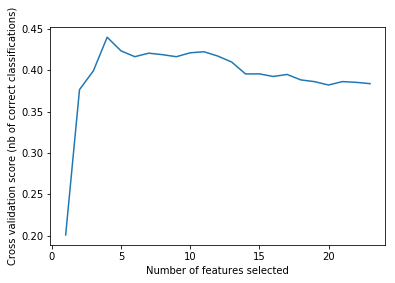

In [46]:
# http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
#                           n_redundant=2, n_repeated=0, n_classes=8,
#                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, encoded)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Apply Data Splitting 

In [47]:
## Not really sure why we ned to do data splitting (holdout) when the graph needs to be drawn.
## Holdout Groups is commonly starting at 30% of data, but 1% to 50% is okay.
data = X
target = Y
#print(data.shape)
#print(target.shape)
#print(data)
#print(target)

# Test your model with different holdout groups.
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=40)

print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

print(X_train.head(10))

79143
38985
3441
1695
      Executive_MNS  Middle_Manager_MNS  Employee_MNS  Worker_MNS  Women_MNS  \
3158      22.200000           13.800000      9.900000   10.400000  10.700000   
29        21.700000           13.300000     10.800000   11.100000  11.500000   
4780      31.500000           19.700000     14.700000   15.300000  18.700000   
471       21.300000           12.900000      9.700000   10.500000  10.100000   
3329      22.200000           14.200000     10.700000   10.800000  11.500000   
479       21.100000           13.200000      9.800000   10.400000  11.100000   
4279      25.100000           13.200000     10.000000   11.700000  10.800000   
2603      21.400000           13.800000     10.200000   10.900000  11.300000   
2719      21.900000           13.400000      9.700000   10.600000  10.100000   
4104      25.300000           15.700000     11.700000   12.600000  13.900000   

      Feminine_Executive_MNS  Feminine_Middle_Manager_MNS  \
3158               19.300000        

# Create KNN Model

In [48]:
from sklearn import neighbors

# Run the knn model, this time with weights.
# instantiate learning model (k = 10)
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

# Fit the X and Y to weighted knn regressor
knn_w.fit(X_train, y_train)

print(knn)
print(knn_w)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')


# Apply PCA to KNN
Here we are now using the training datas, the result is far less data, but the PCA applied still looks similar to the linear regression version.

In [49]:
# X is the scalar of the df data.  Standardize features by removing the mean and scaling to unit variance.
# Dataset might behave badly if the individual feature do no look like standard distributed data.

# Prepare the X and Y variable, where Y is dataframe column.
# fit_transform fits the model with X and apply dimensionality reduction on X.
pca = PCA(0.90)
pca.fit(X_train)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.singular_values_)

[94.05823716  5.91028605  4.1886813 ]
[0.82707469 0.05197044 0.03683199]
[0.82707469 0.87904513 0.91587712]
[568.82364212 142.58816223 120.0377594 ]


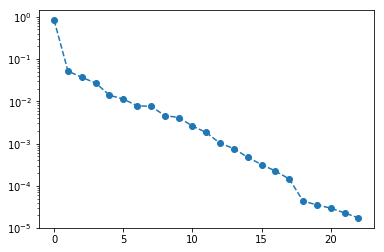

In [50]:
# Y axis says how much can be explained, where 9th variable has very small impact on predicting Property.
pca = PCA().fit(X_train)

plt.semilogy(pca.explained_variance_ratio_, '--o')
plt.show()

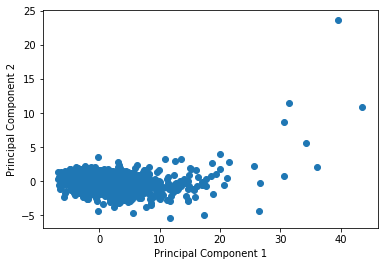

(3441, 23)
(3441, 8)
[[-2.82555659  0.81917428 -0.14852094 ... -0.17130029 -0.11390575
  -0.02495789]
 [-1.30217648  0.69486123 -0.97016156 ...  1.55311455  0.45582366
   0.59197478]
 [15.98683325 -0.52425366 -0.1011755  ...  1.31671731  0.64013761
   0.64761337]
 ...
 [-4.79382125  0.03409551 -0.17846375 ... -0.10417756 -0.26512751
  -0.12753469]
 [-1.38134026 -0.52899584 -0.97450989 ...  1.19050768  0.12583397
  -0.29056931]
 [ 0.13614752  0.65792645 -1.33722939 ... -1.70264766 -2.2238868
   1.63669045]]


In [51]:
# Which variables/how many variables to keep
from sklearn.preprocessing import StandardScaler

# Each of 9 variables (out of 10) have different ranges.
# Standard Scalar makes it so all these different ranges makes sense.
# Standard = each number in the ranges are subtracted by the mean, and divided by standard deviation squared.
# Standard Scalar = same thing, but now the range is 0 to 1. Make everything comparable.
# Some examples are tests, intelligence levels, etc. Trying to standardize everyone.
X_train_std = StandardScaler().fit_transform(X_train)

# Pick the smallest number of Principal Components that explain 95% of the variables.
# That number is = to number of variables you should choose.
sklearn_pca = PCA(0.95)
Y_train_sklearn = sklearn_pca.fit_transform(X_train_std)

plt.scatter(Y_train_sklearn[:,0], Y_train_sklearn[:,3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Each of the column is equal to the principal component.
# 3441 rows, 21 columns.
# 3441 rows, 8 columns.
print(X_train_std.shape)
print(Y_train_sklearn.shape)
print(Y_train_sklearn)

# Apply Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_train, y_train, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

print(score)
print(score_w)

Unweighted Accuracy: 0.98 (+/- 0.03)
Weighted Accuracy: 0.98 (+/- 0.02)
[0.98920243 0.99230608 0.95752958 0.98963902 0.96816922]
[0.98924991 0.99246711 0.96324636 0.98976349 0.97132784]


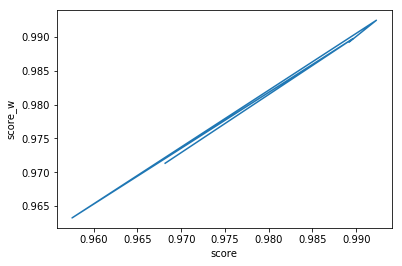

In [53]:
# https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
# plot misclassification error vs k
plt.plot(score, score_w)
plt.xlabel('score')
plt.ylabel('score_w')
plt.show()